In [1910]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm #barra de progreso`
import cv2
from glob import glob

#para redimencionar
import sklearn
import skimage
from skimage.transform import resize

import random
#Usaremos datetime para nombrar archivos
import datetime

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray

print(tf.__version__)


2.10.0


In [1911]:
data =  "PokemonData/"

In [1912]:
targets=["Pikachu","Rattata"]

"""
contador=0
for folderName in os.listdir(data):
    targets.append(folderName)
    if contador>=4:
        break
    contador+=1
"""
print(targets)

['Pikachu', 'Rattata']


In [1913]:
X = []
y = []
for folderName in os.listdir(data):

    if not folderName.startswith('.'):
        if folderName in targets:
            label=targets.index(folderName)
            for image_filename in tqdm(os.listdir(data + folderName)):
                img_file = cv2.imread(data + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 150, 3),mode='constant',anti_aliasing=True)
                    img_file = rgb2gray(img_file)
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
X = np.asarray(X)
y = np.asarray(y)
print(X,y)

100%|██████████| 43/43 [00:03<00:00, 14.32it/s]

[[[0.61404124 0.69100129 0.69344086 ... 0.70807807 0.70251771 0.62294661]
  [0.68817667 0.77453709 0.77845633 ... 0.794685   0.7900314  0.70122845]
  [0.68940127 0.77444019 0.77787075 ... 0.79225779 0.79072405 0.70176153]
  ...
  [0.5610275  0.62660212 0.62188996 ... 0.58864644 0.58777088 0.52369769]
  [0.55558682 0.62109512 0.62006623 ... 0.58784034 0.58775138 0.52321996]
  [0.49172978 0.55190554 0.55195155 ... 0.51963413 0.51940432 0.46237561]]

 [[0.75830719 0.87054034 0.87080836 ... 0.87080836 0.87054034 0.75830719]
  [0.87054034 0.99938453 0.99969222 ... 0.99969222 0.99938453 0.87054034]
  [0.87080836 0.99969222 1.         ... 1.         0.99969222 0.87080836]
  ...
  [0.87080836 0.99969222 1.         ... 1.         0.99969222 0.87080836]
  [0.87054034 0.99938453 0.99969222 ... 0.99969222 0.99938453 0.87054034]
  [0.75830719 0.87054034 0.87080836 ... 0.87080836 0.87054034 0.75830719]]

 [[0.77572754 0.87930662 0.8794584  ... 0.8794584  0.87930662 0.77572754]
  [0.88186268 0.999613

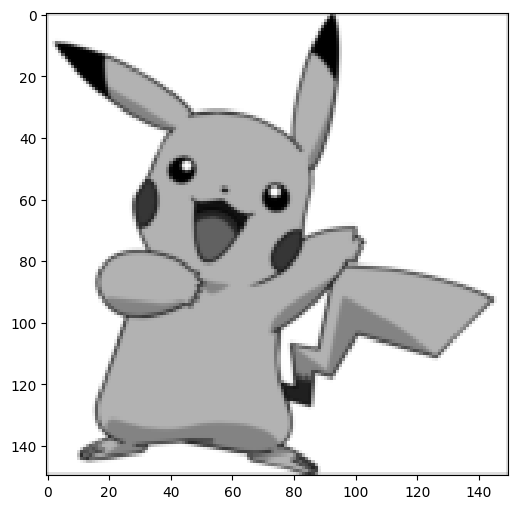

In [1914]:
def plotImage(a):
    plt.figure(figsize=(12,6))
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.show()

plotImage(X[1])

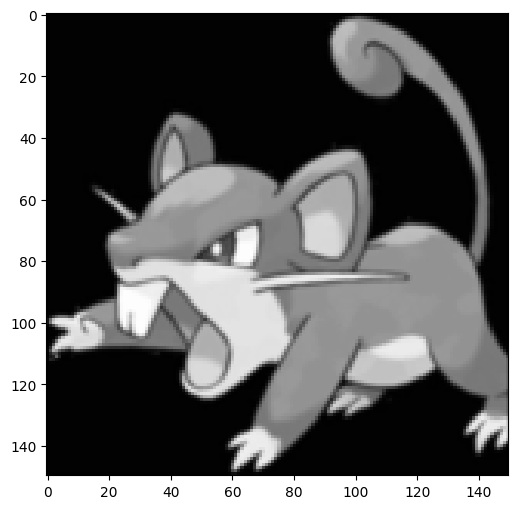

In [1915]:
plotImage(X[78])

In [1916]:
plt.figure(figsize=(8,4))
etiquetas = {0:'Pikachu',1: 'Rattata'}
dict_etiquetas=etiquetas

df = pd.DataFrame()
df["labels"]=y

mascara_Pikachu=df["labels"]==0
df_Pikachu=df[mascara_Pikachu]
print("Abra : ",len(df_Pikachu))

mascara_Rattata=df["labels"]==1
df_Rattata=df[mascara_Rattata]
print("Rattata : ",len(df_Rattata))

Abra :  62
Rattata :  43


<Figure size 800x400 with 0 Axes>

In [1917]:
# RESHAPE
X_Reshaped = X.reshape(len(X),150,150,1)
X_Reshaped

array([[[[0.61404124],
         [0.69100129],
         [0.69344086],
         ...,
         [0.70807807],
         [0.70251771],
         [0.62294661]],

        [[0.68817667],
         [0.77453709],
         [0.77845633],
         ...,
         [0.794685  ],
         [0.7900314 ],
         [0.70122845]],

        [[0.68940127],
         [0.77444019],
         [0.77787075],
         ...,
         [0.79225779],
         [0.79072405],
         [0.70176153]],

        ...,

        [[0.5610275 ],
         [0.62660212],
         [0.62188996],
         ...,
         [0.58864644],
         [0.58777088],
         [0.52369769]],

        [[0.55558682],
         [0.62109512],
         [0.62006623],
         ...,
         [0.58784034],
         [0.58775138],
         [0.52321996]],

        [[0.49172978],
         [0.55190554],
         [0.55195155],
         ...,
         [0.51963413],
         [0.51940432],
         [0.46237561]]],


       [[[0.75830719],
         [0.87054034],
         [0.87

In [1918]:
y=to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [1919]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_Reshaped,y,test_size=0.1,random_state=1)

In [1920]:
y_train.shape

(94, 2)

In [1921]:
x_train.shape

(94, 150, 150, 1)

In [1922]:
model = models.Sequential()

model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(20, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(30, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(40, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_181"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_524 (Conv2D)         (None, 148, 148, 10)      100       
                                                                 
 max_pooling2d_406 (MaxPooli  (None, 74, 74, 10)       0         
 ng2D)                                                           
                                                                 
 conv2d_525 (Conv2D)         (None, 72, 72, 20)        1820      
                                                                 
 max_pooling2d_407 (MaxPooli  (None, 36, 36, 20)       0         
 ng2D)                                                           
                                                                 
 conv2d_526 (Conv2D)         (None, 34, 34, 30)        5430      
                                                                 
 max_pooling2d_408 (MaxPooli  (None, 17, 17, 30)    

In [1923]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [1924]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [1925]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(AccuracyCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True

Accuracy_callback=AccuracyCallback(threshold=1.0)

In [1926]:
class ValAccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ValAccuracyCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True

Val_Accuracy_callback=ValAccuracyCallback(threshold=1.0)

In [1927]:
history=model.fit(x_train,
          y_train,
          epochs=30,
          validation_data = (x_test,y_test),
          callbacks=[tensorboard_callback,Accuracy_callback,Val_Accuracy_callback])

Epoch 1/30
3/3 [==============================] - 2s 359ms/step - loss: 0.6765 - accuracy: 0.5426 - val_loss: 0.7137 - val_accuracy: 0.5455
Epoch 2/30
3/3 [==============================] - 1s 241ms/step - loss: 0.6750 - accuracy: 0.5957 - val_loss: 0.7297 - val_accuracy: 0.5455
Epoch 3/30
3/3 [==============================] - 1s 245ms/step - loss: 0.6418 - accuracy: 0.5957 - val_loss: 0.6742 - val_accuracy: 0.5455
Epoch 4/30
3/3 [==============================] - 1s 241ms/step - loss: 0.6344 - accuracy: 0.6702 - val_loss: 0.6605 - val_accuracy: 0.5455
Epoch 5/30
3/3 [==============================] - 1s 252ms/step - loss: 0.6237 - accuracy: 0.7128 - val_loss: 0.6473 - val_accuracy: 0.5455
Epoch 6/30
3/3 [==============================] - 1s 262ms/step - loss: 0.5920 - accuracy: 0.7128 - val_loss: 0.6372 - val_accuracy: 0.5455
Epoch 7/30
3/3 [==============================] - 1s 241ms/step - loss: 0.5591 - accuracy: 0.6915 - val_loss: 0.6241 - val_accuracy: 0.5455
Epoch 8/30
3/3 [====

In [1947]:
model.save('mymodel/finalModel.h5')
#del model
#model = models.load_model('path_to_my_model.h5')

In [1929]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss,test_acc)

1/1 [==============================] - 0s 47ms/step - loss: 0.1601 - accuracy: 0.9091
0.16009551286697388 0.9090909361839294


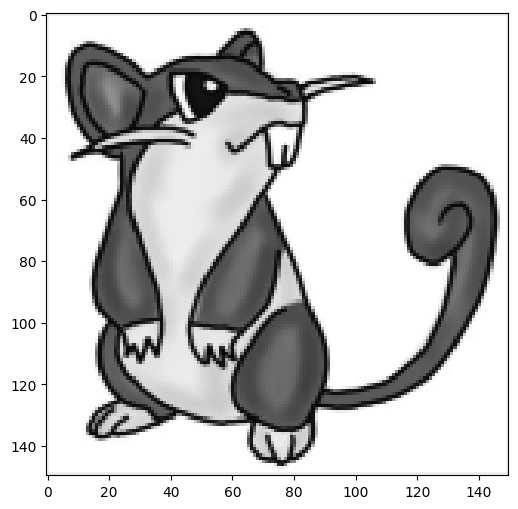

In [1930]:
plotImage(x_test[7])

In [1931]:
y_predict=model.predict(x_test)
y_predict

1/1 [==============================] - 0s 138ms/step


array([[6.20604828e-02, 9.37939465e-01],
       [9.93585527e-01, 6.41451031e-03],
       [9.87258732e-01, 1.27413375e-02],
       [1.93698681e-04, 9.99806345e-01],
       [9.99995708e-01, 4.30738191e-06],
       [9.99994040e-01, 5.94848734e-06],
       [7.54577458e-01, 2.45422587e-01],
       [7.17556744e-04, 9.99282420e-01],
       [9.92712379e-01, 7.28760753e-03],
       [7.48060226e-01, 2.51939803e-01],
       [9.28053912e-03, 9.90719497e-01]], dtype=float32)

# PREDICCION PROPIA

In [1932]:
#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

In [1933]:
ruta_predecir="predecir/"
predecir=[]
for imagen in os.listdir(ruta_predecir):
    my_img = cv2.imread(f"predecir/{imagen}")
    if my_img is not None:
        my_img = skimage.transform.resize(my_img, (150, 150, 3),mode='constant',anti_aliasing=True)
        my_img = rgb2gray(my_img)
        #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
        my_arr = np.asarray(my_img)
        predecir.append(my_arr)
predecir = np.asarray(predecir)
    # mostramos la imagen

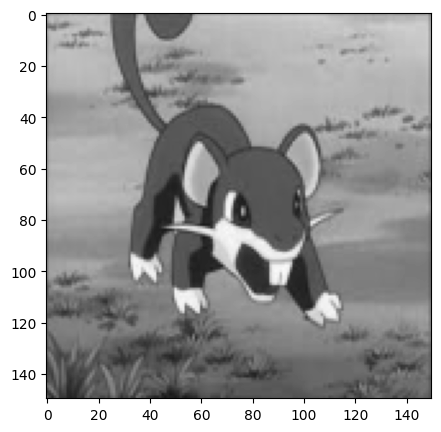

In [1934]:
plt.figure(figsize=(20,5))
plt.imshow(predecir[2], cmap='gray', vmin=0, vmax=1)
plt.show()

In [1935]:
print(predecir)

[[[0.85784893 0.91261071 0.90998794 ... 0.9096386  0.90992636 0.85448501]
  [0.9390367  0.99898119 0.9961102  ... 0.99573551 0.99604279 0.93535441]
  [0.93906183 0.99900793 0.99613686 ... 0.99577022 0.99606945 0.93537945]
  ...
  [0.93906183 0.99900793 0.99613686 ... 0.99607843 0.99606951 0.93537945]
  [0.9390367  0.99898119 0.9961102  ... 0.99605177 0.99604285 0.93535441]
  [0.85784893 0.91261071 0.90998794 ... 0.90993456 0.90992642 0.85448501]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.51510216 0.58962148 0.61995334 ... 0.61804531 0.63717706 0.51864148]
  [0.59838192 0.717306

In [1936]:
X_predecir = predecir.reshape(len(predecir),150,150,1)
X_predecir

array([[[[0.85784893],
         [0.91261071],
         [0.90998794],
         ...,
         [0.9096386 ],
         [0.90992636],
         [0.85448501]],

        [[0.9390367 ],
         [0.99898119],
         [0.9961102 ],
         ...,
         [0.99573551],
         [0.99604279],
         [0.93535441]],

        [[0.93906183],
         [0.99900793],
         [0.99613686],
         ...,
         [0.99577022],
         [0.99606945],
         [0.93537945]],

        ...,

        [[0.93906183],
         [0.99900793],
         [0.99613686],
         ...,
         [0.99607843],
         [0.99606951],
         [0.93537945]],

        [[0.9390367 ],
         [0.99898119],
         [0.9961102 ],
         ...,
         [0.99605177],
         [0.99604285],
         [0.93535441]],

        [[0.85784893],
         [0.91261071],
         [0.90998794],
         ...,
         [0.90993456],
         [0.90992642],
         [0.85448501]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [1937]:
nuevos_targets=[]
for imagen in os.listdir(ruta_predecir):
    nuevos_targets.append(imagen)
nuevos_targets

['imagen0.jpg',
 'imagen1.png',
 'imagen3.png',
 'imagen4.png',
 'imagen5.png',
 'imagen6.png',
 'imagen7.png',
 'imagen8.png']

In [1938]:
y_pred=model.predict(X_predecir)

1/1 [==============================] - 0s 50ms/step


In [1939]:
tags=pd.DataFrame(data=y_pred,columns=['Pikachu','Rattata'],index=nuevos_targets)
tags

,Pikachu,Rattata
imagen0.jpg,9.992094e-01,0.000791
imagen1.png,4.582319e-08,1.000000
imagen3.png,5.515061e-04,0.999448
imagen4.png,6.509267e-01,0.349073
imagen5.png,9.939102e-01,0.006090
imagen6.png,9.999225e-01,0.000077
imagen7.png,5.581419e-01,0.441858
imagen8.png,1.357069e-01,0.864293


In [1940]:
miresultado=[]

for index, row in tags.iterrows():
    valor1=row['Pikachu']
    valor2=row['Rattata']
    #print(valor1,valor2)
    if valor1>valor2:
        miresultado.append("Pikachu")
    else:
        miresultado.append("Rattata")
miresultado

['Pikachu',
 'Rattata',
 'Rattata',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Rattata']

In [1941]:
tags["resultado"]=miresultado
tags

,Pikachu,Rattata,resultado
imagen0.jpg,9.992094e-01,0.000791,Pikachu
imagen1.png,4.582319e-08,1.000000,Rattata
imagen3.png,5.515061e-04,0.999448,Rattata
imagen4.png,6.509267e-01,0.349073,Pikachu
imagen5.png,9.939102e-01,0.006090,Pikachu
imagen6.png,9.999225e-01,0.000077,Pikachu
imagen7.png,5.581419e-01,0.441858,Pikachu
imagen8.png,1.357069e-01,0.864293,Rattata


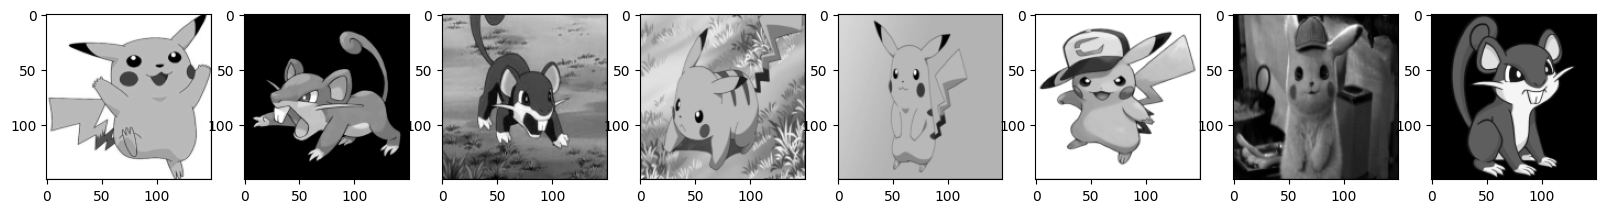

In [1942]:
plt.figure(figsize=(20,5))
for i,valor in enumerate(X_predecir):

    plt.subplot(1,len(X_predecir),i+1)
    plt.imshow(valor, cmap='gray')



plt.show()

#### grafiquemos el modelo y el history

In [1943]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


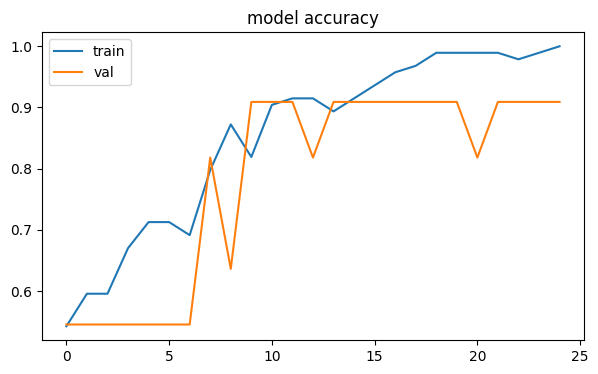

In [1944]:
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

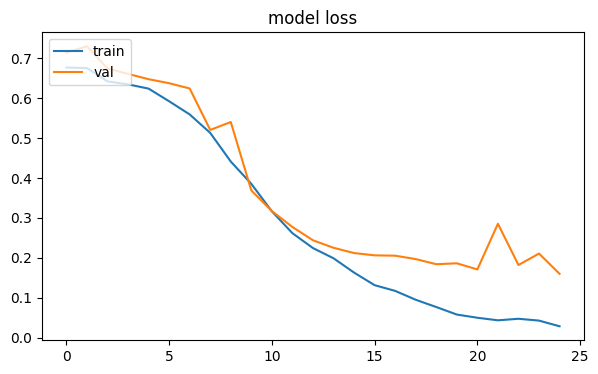

In [1945]:
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<Figure size 700x400 with 0 Axes>

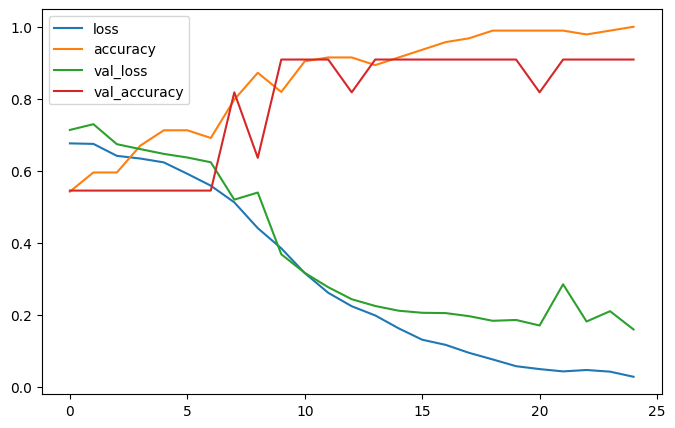

In [1946]:
plt.figure(figsize=(7,4))
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()